In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("Training Dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [75]:
print("Dataset shape:", df.shape)

Dataset shape: (614, 13)


In [76]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [77]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [78]:
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [79]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
print("\nLoan Status Distribution:\n", df['Loan_Status'].value_counts())


Loan Status Distribution:
 Loan_Status
Y    422
N    192
Name: count, dtype: int64


/tmp/ipython-input-81-993071815.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Loan_Status', palette='viridis')


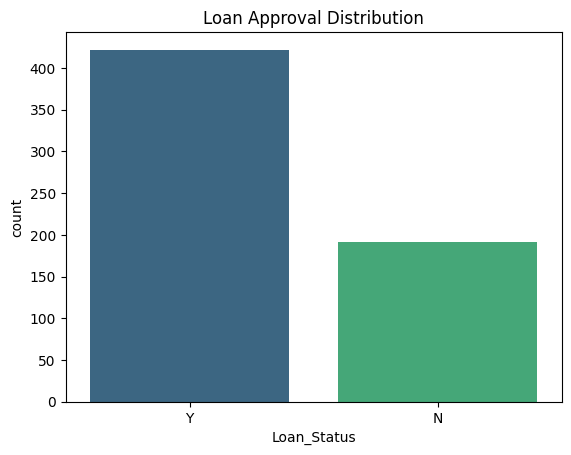

In [81]:
sns.countplot(data=df, x='Loan_Status', palette='viridis')
plt.title("Loan Approval Distribution")
plt.show()

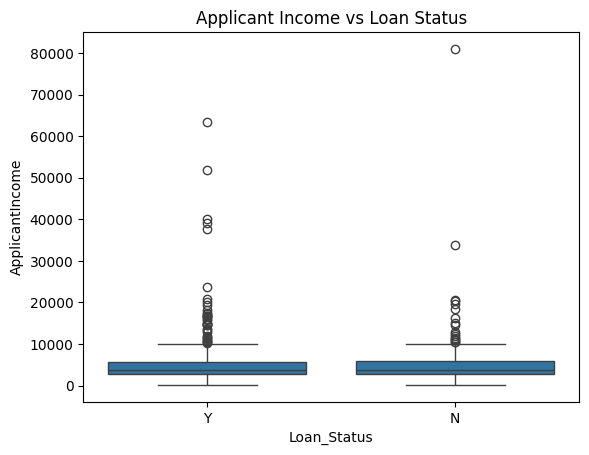

In [82]:
sns.boxplot(data=df, y='ApplicantIncome', x='Loan_Status')
plt.title("Applicant Income vs Loan Status")
plt.show()

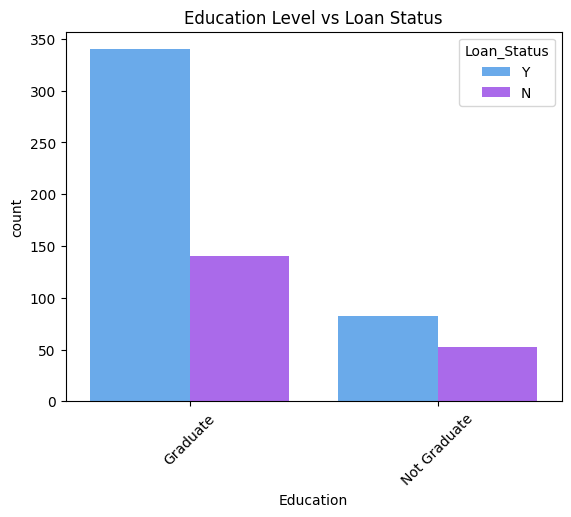

In [83]:
sns.countplot(data=df, x='Education', hue='Loan_Status', palette='cool')
plt.title("Education Level vs Loan Status")
plt.xticks(rotation=45)
plt.show()

In [84]:
# Fill categorical columns with mode
for col in ['Gender', 'Married', 'Self_Employed', 'Dependents', 'Credit_History']:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-84-2426379370.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [85]:
# Fill numerical columns with median
for col in ['LoanAmount', 'Loan_Amount_Term']:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-85-3038560768.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [86]:
total_missing = df.isnull().sum().sum()
if total_missing == 0:
    print("\n✅ All missing values handled successfully.")
else:
    print(f"\n❌ Warning: {total_missing} missing values still remain.")


✅ All missing values handled successfully.


In [87]:
print("🔎 Missing values per column:")
print(df.isnull().sum())


🔎 Missing values per column:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [88]:
binary_mappings = {
    'Gender': {'Male': 1, 'Female': 0},
    'Married': {'Yes': 1, 'No': 0},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'Yes': 1, 'No': 0},
    'Loan_Status': {'Y': 1, 'N': 0}
}

for col, mapping in binary_mappings.items():
    df[col] = df[col].map(mapping)

In [89]:
df['Dependents'].replace('3+', 3, inplace=True)
df['Dependents'] = df['Dependents'].astype(int)

/tmp/ipython-input-89-3763186811.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].replace('3+', 3, inplace=True)


In [90]:
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=False)

In [91]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,False,False,True
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,True,False,False
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,False,False,True
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,False,False,True
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,False,False,True


In [92]:
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (491, 13)
Test shape: (123, 13)


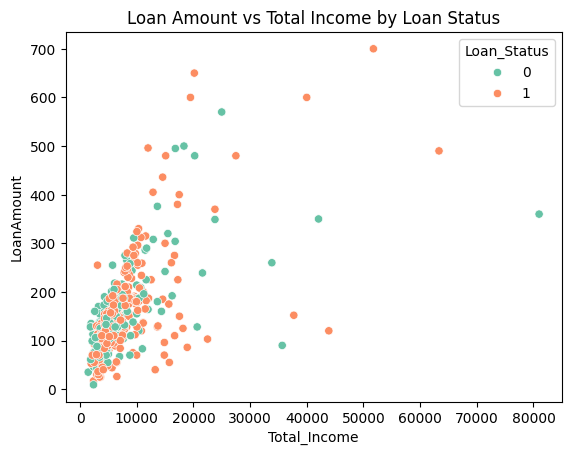

In [ ]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
sns.scatterplot(data=df, x='Total_Income', y='LoanAmount', hue='Loan_Status', palette='Set2')
plt.title("Loan Amount vs Total Income by Loan Status")
plt.show()

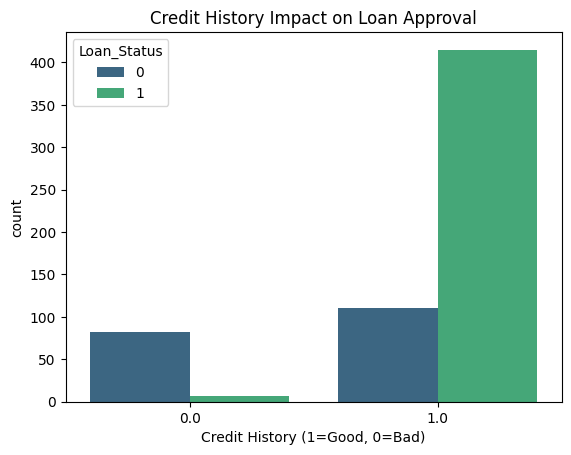

In [ ]:
sns.countplot(data=df, x='Credit_History', hue='Loan_Status', palette='viridis')
plt.title("Credit History Impact on Loan Approval")
plt.xlabel("Credit History (1=Good, 0=Bad)")
plt.show()

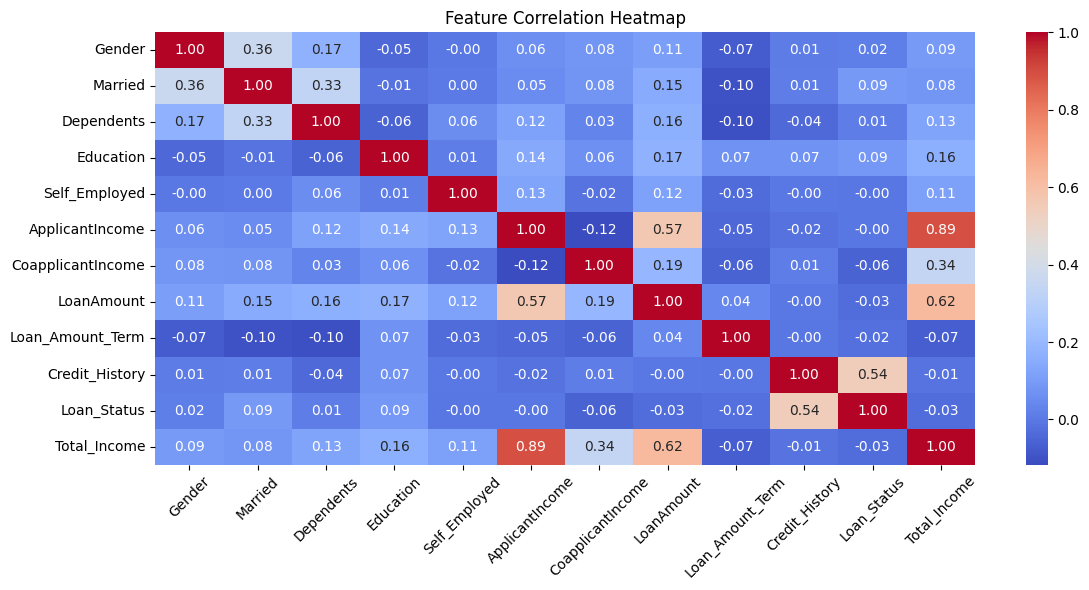

In [95]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [96]:
!pip install shap scikit-learn

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [98]:
# Predict and Evaluate
y_pred = model.predict(X_test)

In [99]:
print(" Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Model Accuracy: 0.7723577235772358

 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



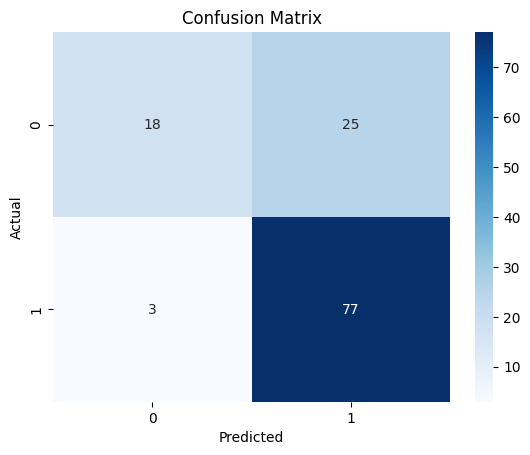

In [100]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best CV Score: 0.8145330859616573


In [102]:
# Increase in Accuracy of the model
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7723577235772358


In [ ]:
# Get feature importances
importances = model.feature_importances_
features = X_train.columns

feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(10)

/tmp/ipython-input-104-2942742608.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')


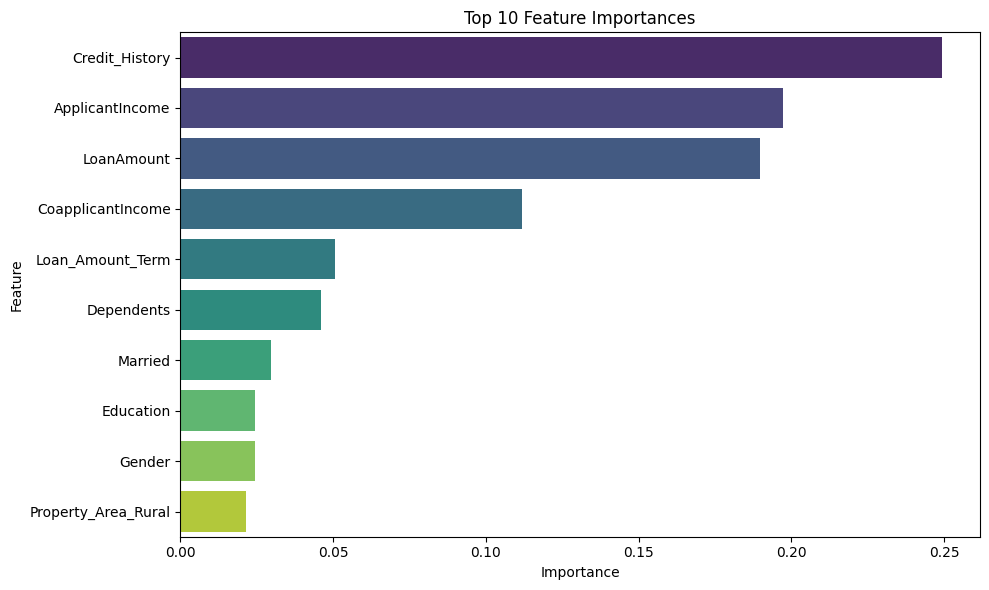

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()

In [105]:
!pip install lime


In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# Preparing the LIME explainer
explainer = LimeTabularExplainer(
    training_data = np.array(X_train),            
    feature_names = X_train.columns.tolist(),
    class_names = ['Rejected', 'Approved'],
    mode = 'classification',
    discretize_continuous = True                  
)


In [ ]:
# Choosing an index from test set
i = 0  
sample = X_test.iloc[i]

exp = explainer.explain_instance(
    data_row = sample.values,                   
    predict_fn = model.predict_proba,
    num_features = 10                          
)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [108]:
exp.show_in_notebook(show_table=True, show_all=False)

In [109]:
print(exp.as_list())

[('Loan_Amount_Term <= 360.00', 0.17025957503618763), ('LoanAmount > 165.00', -0.06600867537150429), ('0.00 < Property_Area_Semiurban <= 1.00', 0.061365007279170616), ('Property_Area_Rural <= 0.00', 0.0560420878092789), ('0.00 < Married <= 1.00', 0.0437962337793189), ('CoapplicantIncome <= 0.00', -0.022847891139000053), ('Self_Employed <= 0.00', 0.015658495975416898), ('Property_Area_Urban <= 0.00', 0.012000788782241065), ('ApplicantIncome > 5938.00', 0.008700766832087625), ('Dependents <= 0.00', 0.00634915682494394)]


In [110]:
exp.save_to_file('lime_explanation.html')

In [ ]:
probas = model.predict_proba(X_test)

# Finding indexes where model predicted rejection (P(Approved) < 0.5)
rejected_indexes = [i for i, p in enumerate(probas) if p[1] < 0.5]
print(f"Found {len(rejected_indexes)} samples predicted as Rejected.")
print("First few rejected indexes:", rejected_indexes[:5])

Found 21 samples predicted as Rejected.
First few rejected indexes: [10, 35, 47, 48, 49]


In [112]:
from lime.lime_tabular import LimeTabularExplainer

def explain_prediction_lime(model, X_train, X_test, index, class_names=['Rejected', 'Approved']):
    """
    Explains a loan prediction for one sample using LIME and returns a human-readable summary.

    Parameters:
        model: Trained classification model (e.g., RandomForestClassifier)
        X_train: Training feature set (DataFrame)
        X_test: Test feature set (DataFrame)
        index: Row index in X_test to explain
        class_names: Class labels (default: ['Rejected', 'Approved'])

    Returns:
        str: Natural language explanation of the prediction
    """
    import numpy as np

    # Step 1: Create the LIME explainer
    explainer = LimeTabularExplainer(
        training_data=np.array(X_train),
        feature_names=X_train.columns.tolist(),
        class_names=class_names,
        mode='classification',
        discretize_continuous=True
    )

    # Step 2: Explain the instance
    exp = explainer.explain_instance(
        data_row=X_test.iloc[index].values,
        predict_fn=model.predict_proba,
        num_features=10
    )

    # Step 3: Get prediction
    prediction_proba = model.predict_proba([X_test.iloc[index].values])[0]
    predicted_class = int(np.argmax(prediction_proba))
    predicted_label = class_names[predicted_class]
    confidence = round(prediction_proba[predicted_class] * 100, 2)

    # Step 4: Parse the LIME explanation
    explanation = exp.as_list()
    positives = []
    negatives = []

    for feature, impact in explanation:
        if impact >= 0:
            positives.append((feature, impact))
        else:
            negatives.append((feature, impact))

    # Step 5: Build the explanation text
    summary = f"The loan was [{predicted_label}] with a confidence of {confidence}%.\n\n"

    if positives:
        summary += "Factors that supported the approval:\n"
        for feat, score in positives:
            summary += f"- {feat} (+{round(score, 3)})\n"

    if negatives:
        summary += "\nFactors that reduced the chance:\n"
        for feat, score in negatives:
            summary += f"- {feat} ({round(score, 3)})\n"

    return summary
index_to_explain = 1
print(explain_prediction_lime(model, X_train, X_test, index_to_explain))

The loan was [Approved] with a confidence of 90.0%.

Factors that supported the approval:
- Loan_Amount_Term <= 360.00 (+0.173)
- 0.00 < Property_Area_Semiurban <= 1.00 (+0.073)
- Property_Area_Rural <= 0.00 (+0.047)
- 0.00 < Married <= 1.00 (+0.045)
- 3900.00 < ApplicantIncome <= 5938.00 (+0.024)
- 128.00 < LoanAmount <= 165.00 (+0.023)
- Property_Area_Urban <= 0.00 (+0.015)

Factors that reduced the chance:
- CoapplicantIncome <= 0.00 (-0.029)
- Dependents <= 0.00 (-0.01)
- Self_Employed <= 0.00 (-0.001)



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import joblib

joblib.dump(model, "loan_model.pkl")
X_train.to_csv("X_train.csv", index=False)

In [114]:
from google.colab import files

files.download("loan_model.pkl")
files.download("X_train.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>